In [1]:
#importing importing libraries required for EDA 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore,boxcox
import warnings 
warnings.filterwarnings('ignore')


In [2]:
#retriving the sale dataset
sale=pd.read_csv('SALE CHANNEL.csv')

In [3]:
sale

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
#dropping unwanted column
sale.drop(['Unnamed: 0'],axis=1,inplace=True)
sale

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
sale.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [6]:
sale.tail(10)

,TV,radio,newspaper,sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,9.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [7]:
type(sale)

pandas.core.frame.DataFrame

In [8]:
sale.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [9]:
sale.shape

(200, 4)

In [10]:
((sale.min())*1000).round(1)
##checkimg minimum amount spent on advertisements (in thousands of dollar)on various mediums and maximum sale obtained (in thousand)

TV            700.0
radio           0.0
newspaper     300.0
sales        1600.0
dtype: float64

In [11]:
((sale.max())*1000).round(1)
#checkimg maximum amount spent on advertisements (in thousand s of dollar)on various mediums and maximum sale obtained (in thousand)

TV           296400.0
radio         49600.0
newspaper    114000.0
sales         27000.0
dtype: float64

In [12]:
(sale.mean())*1000
#checking average amount spent in various medium (in thousand $ scale) and average sale (in thousand) 

TV           147042.5
radio         23264.0
newspaper     30554.0
sales         14022.5
dtype: float64

In [13]:
(sale.median())*1000
#checking mid values of amount spent in various mediums (in thousand $ scale) and average sale (in thousand) 

TV           149750.0
radio         22900.0
newspaper     25750.0
sales         12900.0
dtype: float64

In [14]:
(sale.std())*1000
#checking standard deviatio of amount spent in various mediums (in thousand $ scale) and average sale (in thousand) 

TV           85854.236315
radio        14846.809176
newspaper    21778.620839
sales         5217.456566
dtype: float64

In [15]:
sale.info()
#checking the datatype,presence of null values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [16]:
sale.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

No trace of any null values

In [17]:
#checking for any duplicate entries
dup=(sale.duplicated(keep='first')).sum()
dup

0

no trace of any duplicated entries

In [18]:
sale.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


The describe method is indicating that the 'newspaper' is highly deviated as there is a huge difference between the minimum value and maximum value as compared to others

In [19]:
sale.groupby(sale['TV']).mean()

,radio,newspaper,sales
TV,,,
0.7,39.6,8.7,1.6
4.1,11.6,5.7,3.2
5.4,29.9,9.4,5.3
7.3,28.1,41.4,5.5
7.8,38.9,50.6,6.6
...,...,...,...
289.7,42.3,51.2,25.4
290.7,4.1,8.5,12.8
292.9,28.3,43.2,21.4


In [22]:
#implementing graphical methods for eda

Text(0.5, 1.0, 'BARPLOT FOR INVESTMENT IN TV BASED ADVERTISEMENT')

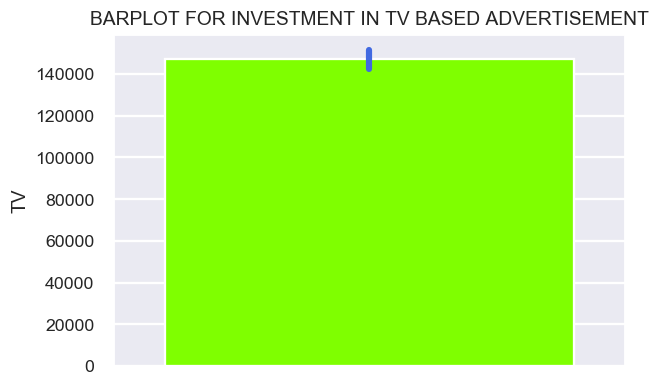

In [23]:
plt.figure(figsize=(6,4),dpi=110)
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=0.7)
sns.barplot(x=sale['TV']*1000, ci=55,orient='v',color='chartreuse',saturation=28, errcolor='royalblue') 
plt.title('BARPLOT FOR INVESTMENT IN TV BASED ADVERTISEMENT')

Text(0.5, 1.0, 'BARPLOT FOR INVESTMENT ON RADIO BASED ADVERTISEMENT')

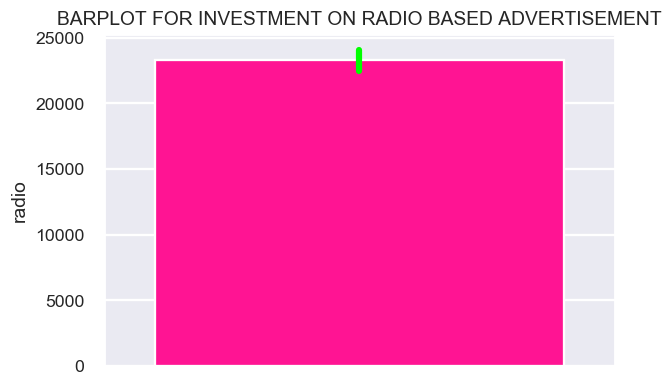

In [24]:
plt.figure(figsize=(6,4),dpi=110)
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=0.7)
sns.barplot(x=sale['radio']*1000, ci=55,orient='v',color='deeppink',saturation=28, errcolor='lime') 
plt.title('BARPLOT FOR INVESTMENT ON RADIO BASED ADVERTISEMENT')

Text(0.5, 1.0, 'BARPLOT FOR INVESTMENT IN TV BASED ADVERTISEMENT')

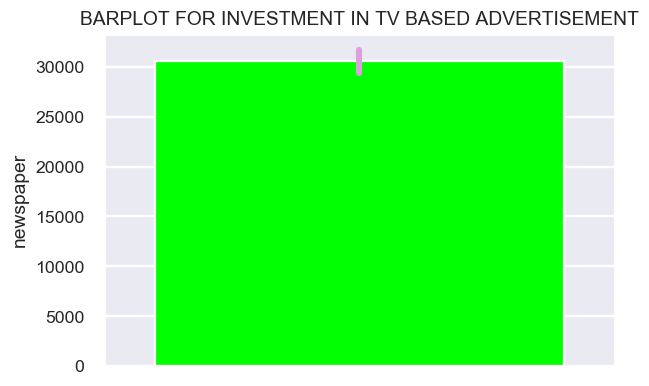

In [25]:
plt.figure(figsize=(6,4),dpi=110)
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=0.7)
sns.barplot(x=sale['newspaper']*1000, ci=55,orient='v',color='lime',saturation=28, errcolor='plum') 
plt.title('BARPLOT FOR INVESTMENT IN TV BASED ADVERTISEMENT')

Text(0.5, 1.0, 'BARPLOT TOTAL SALE AFTER ADVERTISEMENT')

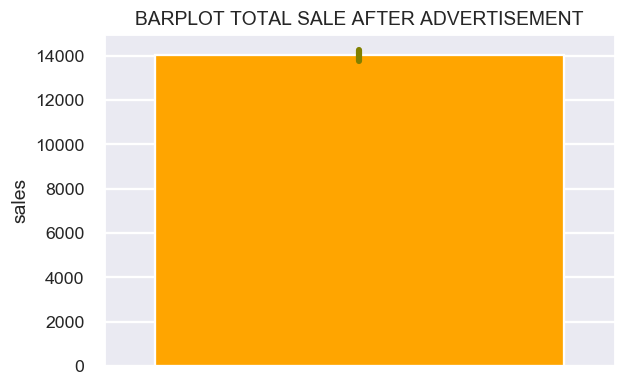

In [26]:
plt.figure(figsize=(6,4),dpi=110)
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=0.7)
sns.barplot(x=sale['sales']*1000, ci=55,orient='v',color='orange',saturation=28, errcolor='olive') 
plt.title('BARPLOT TOTAL SALE AFTER ADVERTISEMENT')

In [27]:
sale.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

Text(0.5, 1.0, 'LINEPLOT TO SHOW THE INVESTMENT ON TV ADVERTISEMENTS AND SALES ')

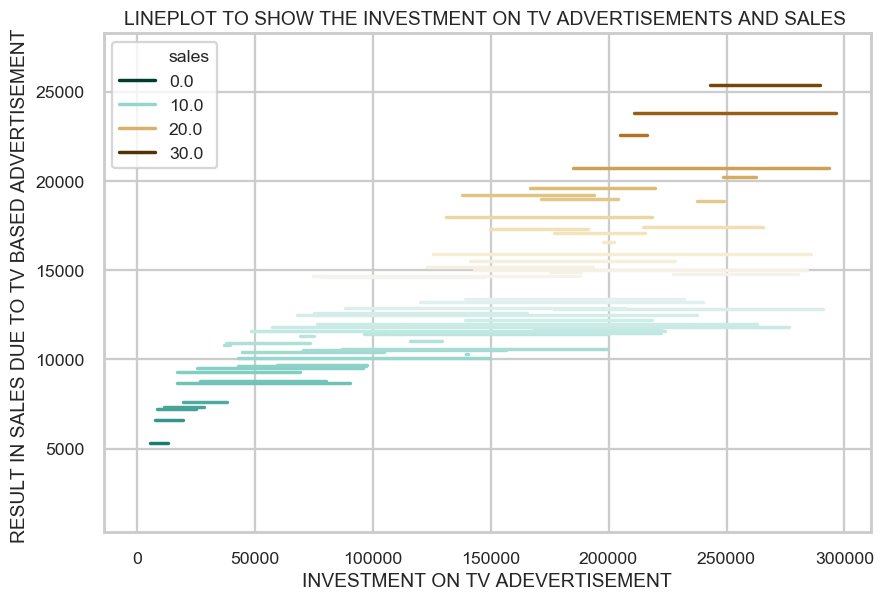

In [28]:
plt.figure(figsize=(9,6),dpi=110)
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=0.7)
sns.lineplot(x=sale['TV']*1000, y=sale['sales']*1000, hue=sale['sales'],data=sale,palette='BrBG_r',dashes=True,estimator='mean', ci=50,err_style='bars', legend='brief')
plt.xlabel('INVESTMENT ON TV ADEVERTISEMENT')
plt.ylabel('RESULT IN SALES DUE TO TV BASED ADVERTISEMENT ')
plt.title('LINEPLOT TO SHOW THE INVESTMENT ON TV ADVERTISEMENTS AND SALES ')

The above plot is showing that investment of 250000 to 300000 dollars on advertisement on TV gave a hugh response to the product..

Text(0.5, 1.0, 'LINEPLOT TO SHOW THE INVESTMENT ON RADIO BASED ADVERTISEMENTS AND SALES ')

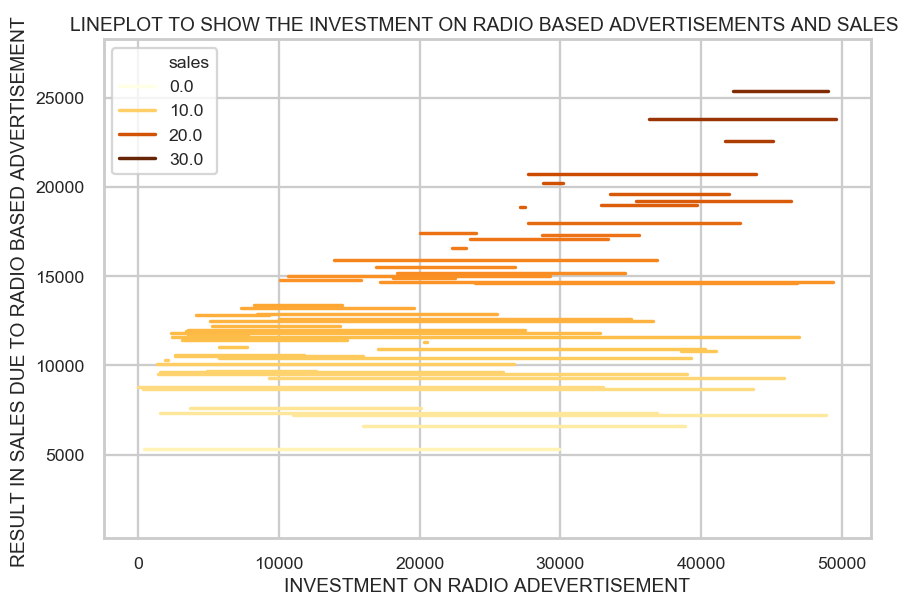

In [29]:
plt.figure(figsize=(9,6),dpi=110)
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=0.7)
sns.lineplot(x=sale['radio']*1000, y=sale['sales']*1000, hue=sale['sales'],data=sale,palette='YlOrBr',dashes=True,estimator='mean', ci=50,err_style='bars', legend='brief')
plt.xlabel('INVESTMENT ON RADIO ADEVERTISEMENT')
plt.ylabel('RESULT IN SALES DUE TO RADIO BASED ADVERTISEMENT ')
plt.title('LINEPLOT TO SHOW THE INVESTMENT ON RADIO BASED ADVERTISEMENTS AND SALES ')

The above plot is showing a pattern of but investment of 50000 dollars on radio based advertisement gave a bump to the sale of the product.

Text(0.5, 1.0, 'LINEPLOT TO SHOW THE INVESTMENT ON NEWSPAPER ADVERTISEMENTS AND SALES ')

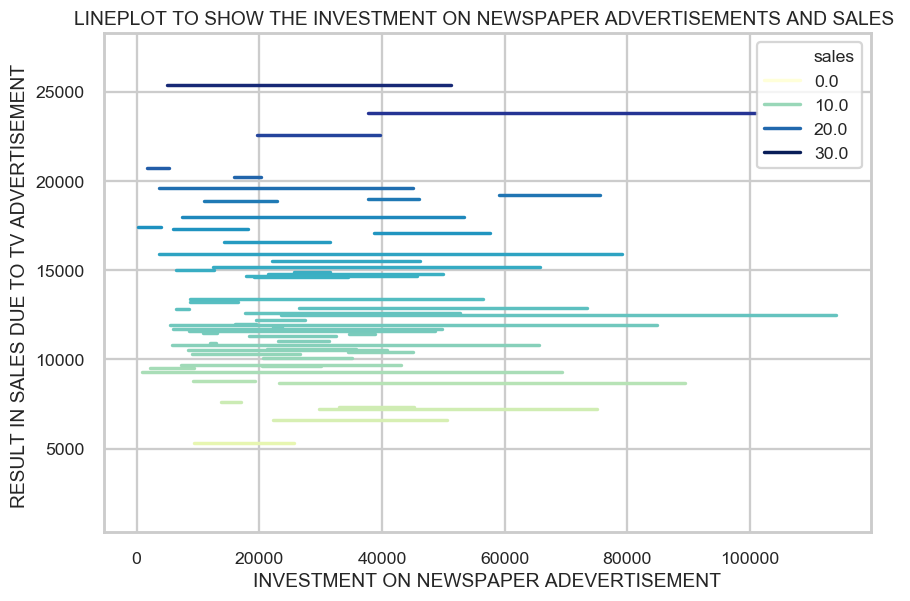

In [30]:
plt.figure(figsize=(9,6),dpi=110)
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=0.7)
sns.lineplot(x=sale['newspaper']*1000, y=sale['sales']*1000, hue=sale['sales'],data=sale,palette='YlGnBu',dashes=True,estimator='mean', ci=50,err_style='bars', legend='brief')
plt.xlabel('INVESTMENT ON NEWSPAPER ADEVERTISEMENT')
plt.ylabel('RESULT IN SALES DUE TO TV ADVERTISEMENT ')
plt.title('LINEPLOT TO SHOW THE INVESTMENT ON NEWSPAPER ADVERTISEMENTS AND SALES ')

a investment of 20000 to 40000 dollars in news paper based advertisemnt gave a good response to the product sell as compaered.

In [31]:
cl=sale.columns.values
cl

array(['TV', 'radio', 'newspaper', 'sales'], dtype=object)

<Figure size 2800x5600 with 0 Axes>

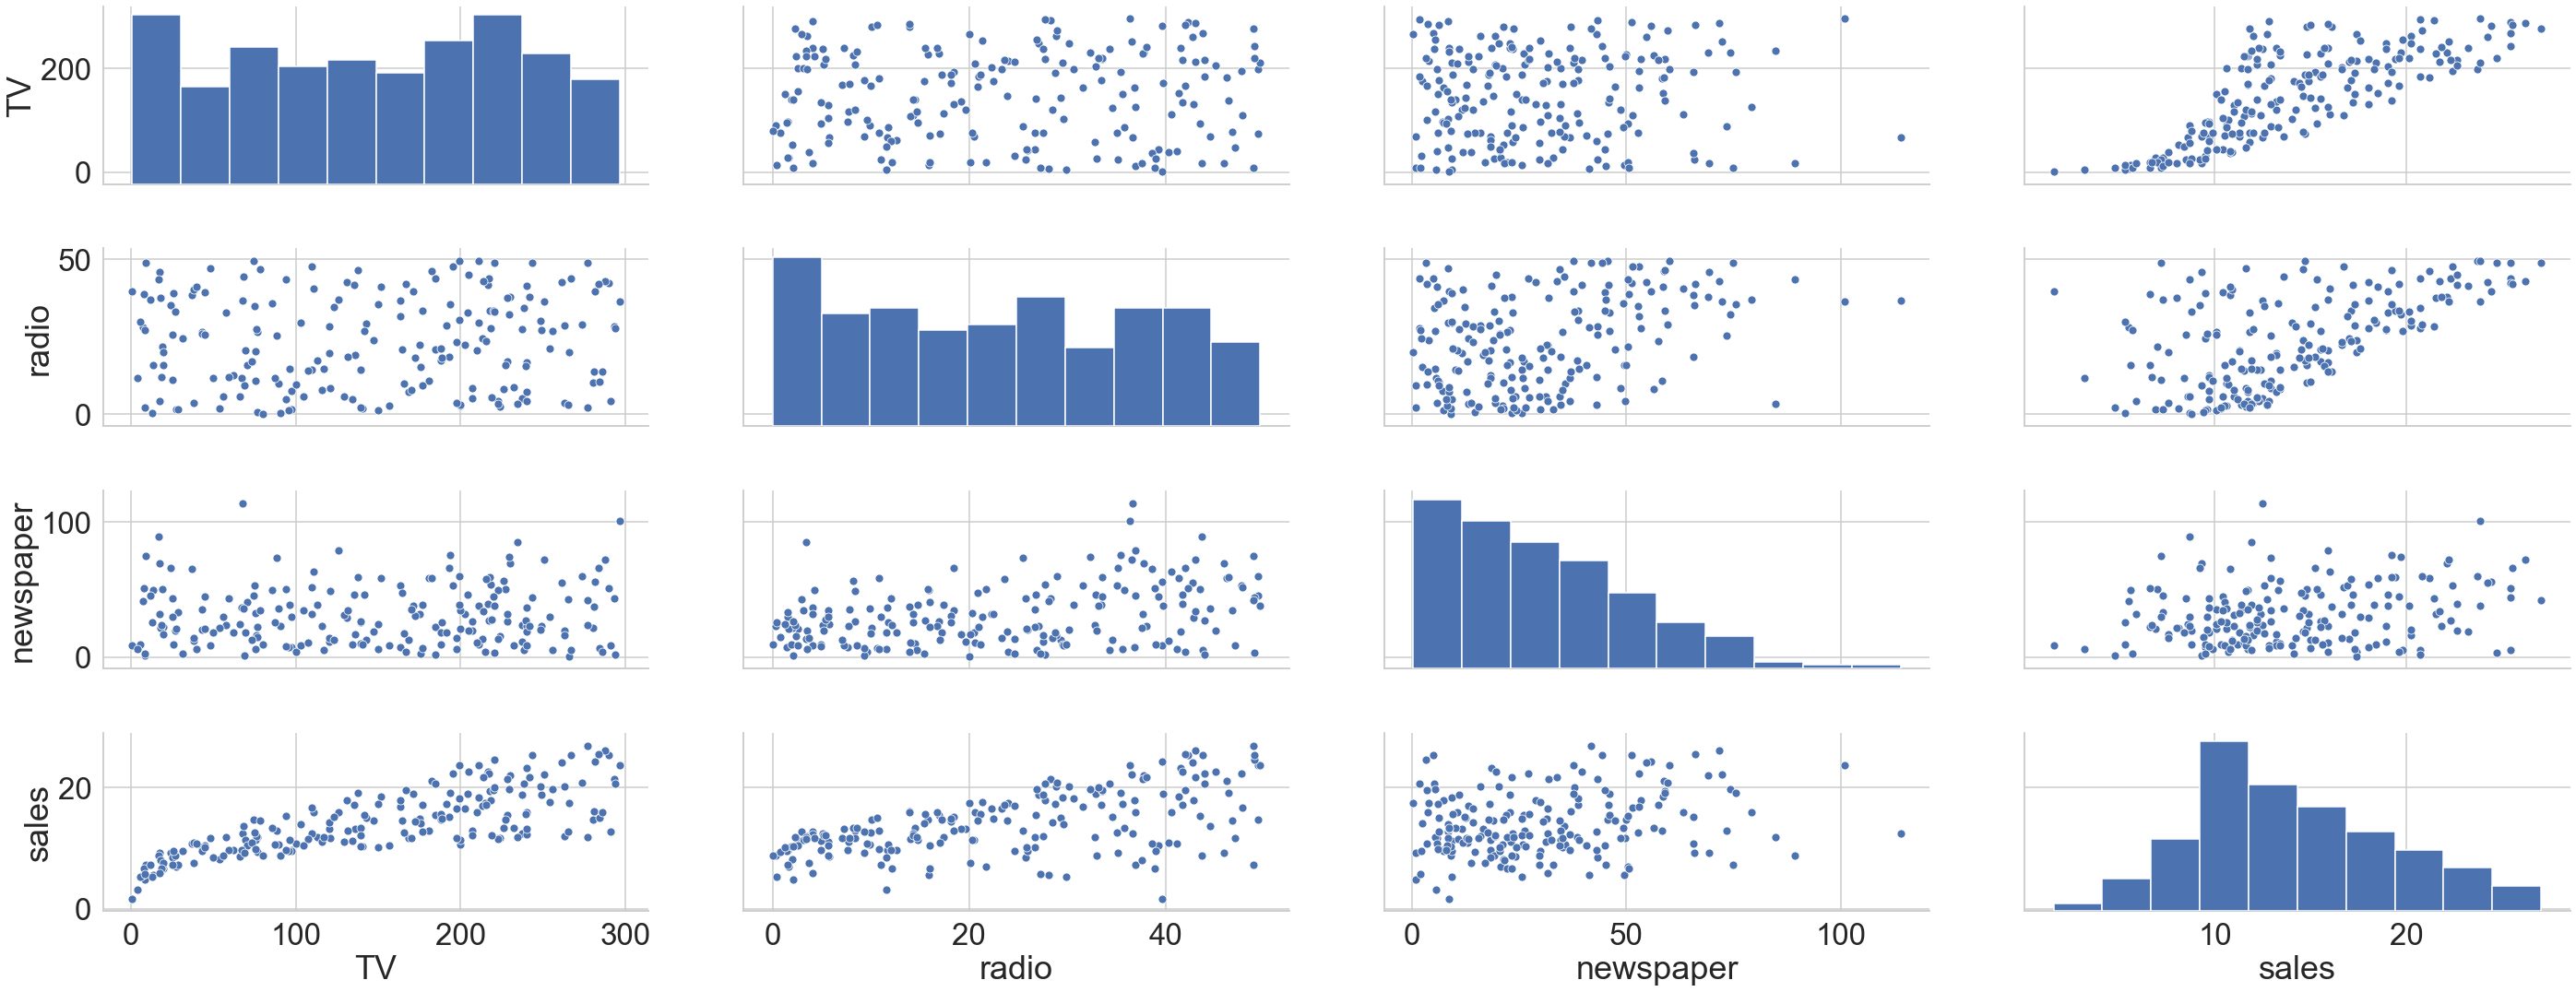

In [32]:
#checking the relation between each attributes with the hep of a pairplot
plt.figure(figsize=(20,40),dpi=140)
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=2)
sns.pairplot(sale,height=4,aspect=2.5)
plt.show()

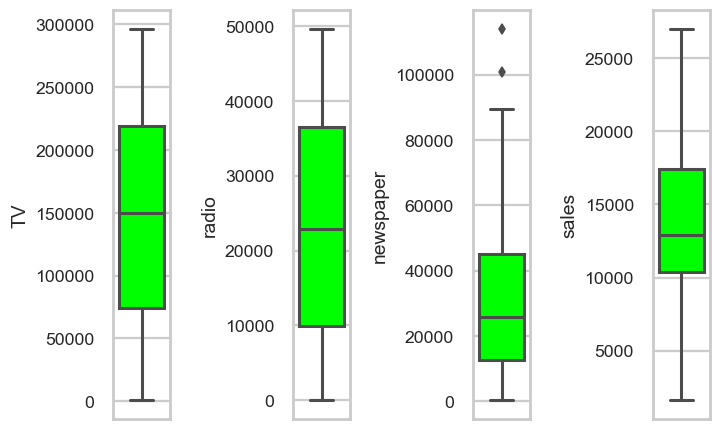

In [33]:
plt.figure(figsize=(10,8),dpi=110)
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=0.7)
for i in range (0,4):
    plt.subplot(2,6,i+1)
    sns.boxplot(x=sale[cl[i]]*1000,orient='v',saturation=22,linewidth=2,color='lime')
plt.tight_layout()
    

In [34]:
z=np.abs(zscore(sale))
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

In [35]:
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [36]:
#checking few outliers
print(z[16][2],'\n',z[101][2])

3.8411707150992718 
 3.238153957342154


In [37]:
sales=sale[(z<3).all(axis=1)]

In [38]:
print('Shape of the datset before outlier removal was:',sale.shape,
     '\nShape of the dataset after outlier becomes: ',sales.shape)

Shape of the datset before outlier removal was: (200, 4) 
Shape of the dataset after outlier becomes:  (198, 4)


so a total of 2 of rows with outliers has been removed from the dataset 

In [39]:
sales

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [40]:
#checking the disribution of data and skewness

In [41]:
cl=sales.columns.values

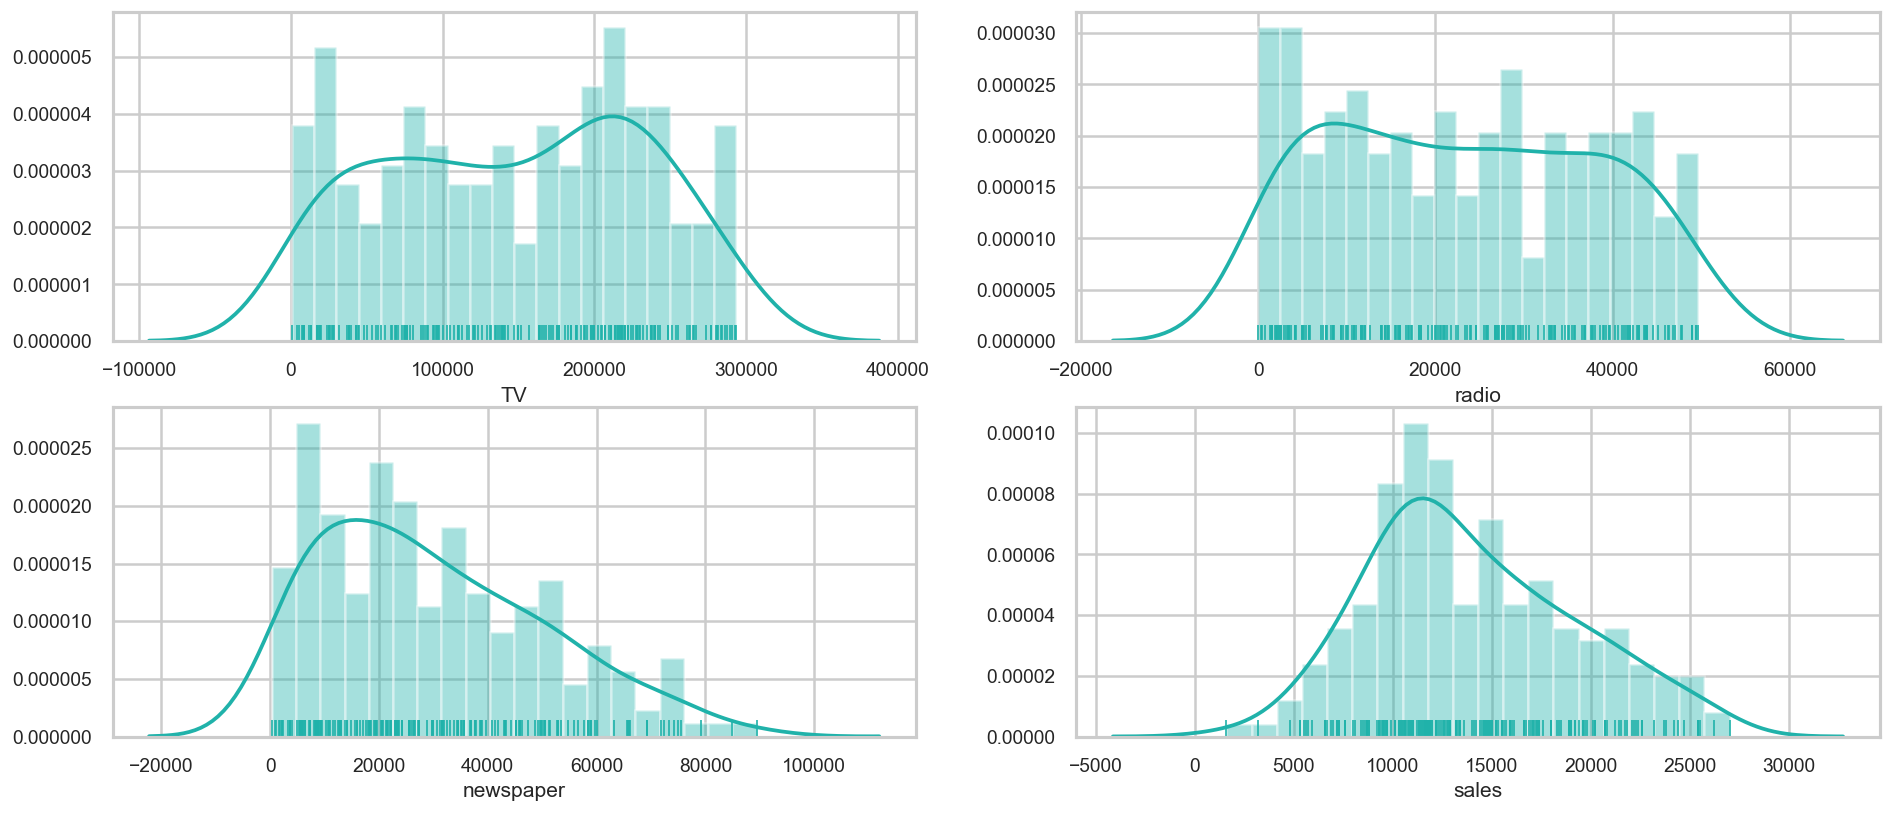

In [42]:
plt.figure(figsize=(19,8),dpi=120)
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=0.7)
for i in range (0,4):
    plt.subplot(2,2,i+1)
    sns.distplot(sales[cl[i]]*1000,kde=True,hist=True,rug=True,bins=20,color='lightseagreen')
plt.show()

#skewness detection

In [43]:
sales.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [44]:
#a skewness value more than 0.55 is treated as skewed so that must be removed

for i in sales.columns:
    if sales.skew().loc[i]>0.55:
        sales[i]=np.log1p(sales[i])

print(sales.skew())
#rechecking the skew 

TV          -0.082332
radio        0.114842
newspaper   -0.839481
sales        0.407130
dtype: float64


the skew has been removed

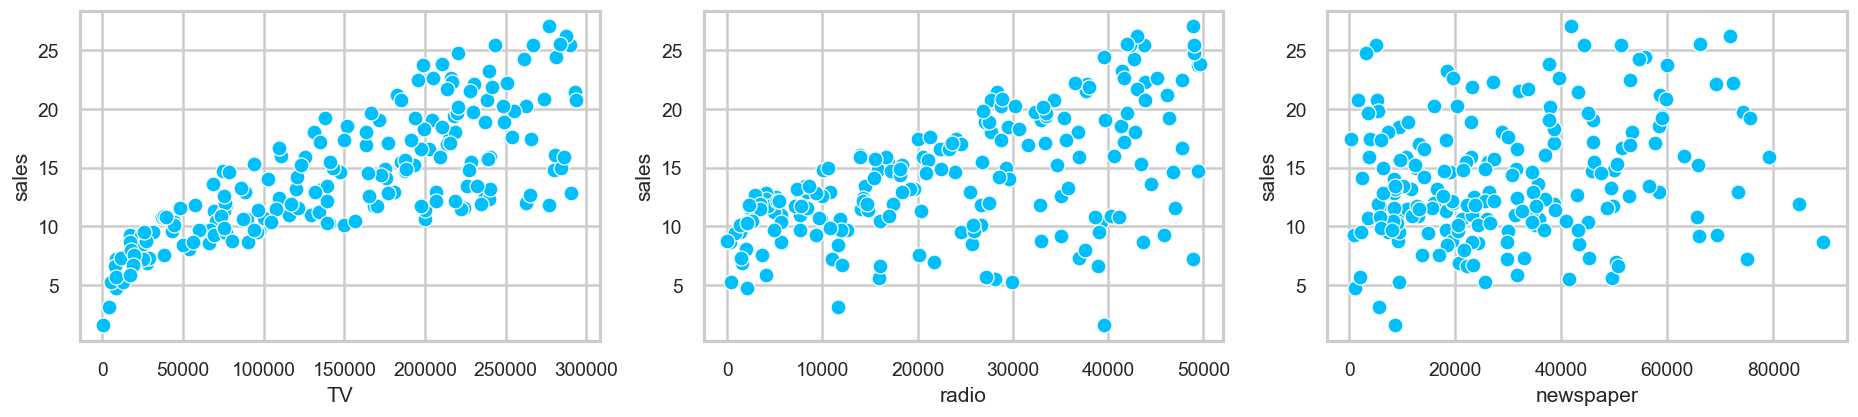

In [45]:
plt.figure(figsize=(19,8),dpi=120)
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=0.7)
for i in range (0,3):
    plt.subplot(2,3,i+1)
    sns.scatterplot(x=(sale[cl[i]]*1000).head(250),y=sales['sales'].head(250),color='deepskyblue')
plt.show()

Investment in TV & Radio advertisement and Sales are showing a linear relation while the relations between investment in Newspaper and sale are not displaying a linear relation

In [46]:
sale_corr=sales.corr()
sale_corr

,TV,radio,newspaper,sales
TV,1.000000,0.051978,0.025205,0.779121
radio,0.051978,1.000000,0.240773,0.576748
newspaper,0.025205,0.240773,1.000000,0.154937
sales,0.779121,0.576748,0.154937,1.000000


<Figure size 1200x840 with 0 Axes>

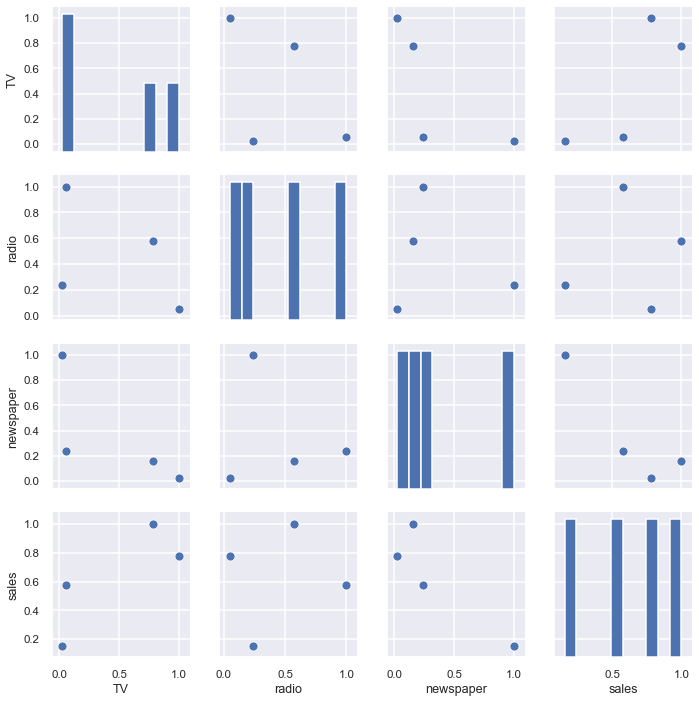

In [47]:
plt.figure(figsize=(10,7),dpi=120)
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=0.7)
sns.pairplot(sale_corr)
plt.show()

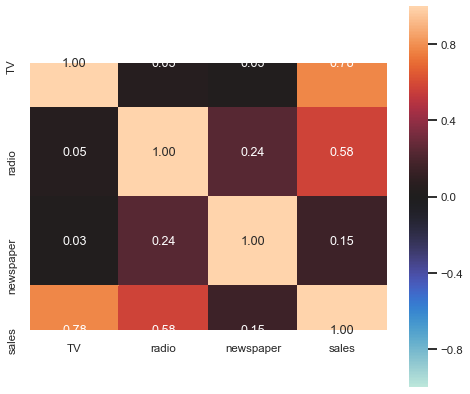

In [48]:
plt.figure(figsize=(8,7))
sns.heatmap(sale_corr,vmax=1,vmin=-1,annot=True,fmt='.2f',cmap='icefire',square=True)
plt.show()

In [49]:
#as all the outliers and skewness were removed now we can design a model for the predictions
sales

,TV,radio,newspaper,sales
0,230.1,37.8,4.251348,22.1
1,44.5,39.3,3.830813,10.4
2,17.2,45.9,4.252772,9.3
3,151.5,41.3,4.085976,18.5
4,180.8,10.8,4.084294,12.9
...,...,...,...,...
195,38.2,3.7,2.694627,7.6
196,94.2,4.9,2.208274,9.7
197,177.0,9.3,2.001480,12.8
198,283.6,42.0,4.207673,25.5


In [50]:
#importing important librarier for modelling
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts, GridSearchCV as gsv, cross_val_score as cvs
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [51]:
#splitting the dataset
x=sales.iloc[:,0:3]
y=sales.iloc[:,-1]

print('x\n','--'*20,'\n',x,'\n','--'*20,'\ny\n','--'*20,'\n',y)


x
 ---------------------------------------- 
         TV  radio  newspaper
0    230.1   37.8   4.251348
1     44.5   39.3   3.830813
2     17.2   45.9   4.252772
3    151.5   41.3   4.085976
4    180.8   10.8   4.084294
..     ...    ...        ...
195   38.2    3.7   2.694627
196   94.2    4.9   2.208274
197  177.0    9.3   2.001480
198  283.6   42.0   4.207673
199  232.1    8.6   2.272126

[198 rows x 3 columns] 
 ---------------------------------------- 
y
 ---------------------------------------- 
 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64


In [52]:
#using standardscaler to scale the data within a range of 0 +/- 1
ss=StandardScaler()
x=ss.fit_transform(x)

In [53]:
y=np.array(y)
y=y.reshape(-1,1)
print('shape of x =',x.shape,'\nshape of y =',y.shape)

shape of x = (198, 3) 
shape of y = (198, 1)


In [54]:
#creating a function to get the best random state for a model to get optimum performing model
def model(mod,x,y):
    max_r=0
    for i in range(20,220):
        x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=i)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        r2score=r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        if r2score > max_r:
            max_r=r2score
            random_state=i
    print('In this', mod,'model',
          '\n Random State= ',random_state, 
           '\n r2 score is= ',r2score,
          '\n mean abs error value is= ', MAE,
          '\n mean squared error value is= ',MSE,
          '\n & root mean sq error is= ', RMSE,
         '\n r2_score in percent is= ',(r2score*100).round(3))
    
    return random_state

Linear Regression

In [55]:
lireg=LinearRegression()
m1=model(lireg,x,y)

In this LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) model 
 Random State=  203 
 r2 score is=  0.8980866811261671 
 mean abs error value is=  1.1612985381116394 
 mean squared error value is=  2.2830720776509406 
 & root mean sq error is=  1.5109838111809606 
 r2_score in percent is=  89.809


In [56]:
#checking for over/under fitting using cross_val_score
lr_scr=cvs(lireg,x,y,cv=30,scoring='r2')
print('the r2 score at liner regression model is=', ((lr_scr.mean()*100).round(3)))

the r2 score at liner regression model is= 84.944


Lasso Regression

In [57]:
import warnings
warnings.filterwarnings('ignore')

#checking for best parameters for Lasso
lso=Lasso()
lso_para={'alpha':(0.01,0.1,1.0,10,)}
lso_grid=gsv(lso,lso_para,cv=30)
lso_grid.fit(x,y)
lso_grid.best_params_

{'alpha': 0.1}

In [58]:
#lassoRegression model generation
lso=Lasso(alpha=0.1,warm_start=True)
m2=model(lso,x,y)

In this Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=True) model 
 Random State=  203 
 r2 score is=  0.9026555149871207 
 mean abs error value is=  1.1378244289885135 
 mean squared error value is=  2.180720617305674 
 & root mean sq error is=  1.4767263176721928 
 r2_score in percent is=  90.266


In [59]:
#checking for over/under fitting using cross_val_score
lso_scr=cvs(lso,x,y,cv=30,scoring='r2')
print('the r2 score at Lasso regression model is=', ((lso_scr.mean()*100).round(3)))

the r2 score at Lasso regression model is= 85.254


DecisionTreeRegressor

In [60]:
#checking for best parameters for DTR using GridSearchCV
dtr=DecisionTreeRegressor()
dtr_para={'criterion':('mse','mae','friedman_mse'),'splitter':('best','random'),'max_depth':(3,5,10)}
dtr_grid=gsv(dtr,dtr_para,cv=30)
dtr_grid.fit(x,y)
dtr_grid.best_params_

{'criterion': 'friedman_mse', 'max_depth': 10, 'splitter': 'best'}

In [61]:
#model generation
dtr=DecisionTreeRegressor(criterion='friedman_mse',max_depth=10,splitter='best')
m3=model(dtr,x,y)

In this DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') model 
 Random State=  81 
 r2 score is=  0.948626461684205 
 mean abs error value is=  0.8258333333333333 
 mean squared error value is=  1.1508749999999996 
 & root mean sq error is=  1.0727884227563231 
 r2_score in percent is=  94.863


In [62]:
#checking for over/under fitting using cross_val_score
dtr_scr=cvs(dtr,x,y,cv=30,scoring='r2')
print('the r2 score at DTR model is=', ((dtr_scr.mean()*100).round(3)))

the r2 score at DTR model is= 94.645


SupportVectorRegressor

In [63]:
#checking for best parameters for SVR using GridSearchCV
svr=SVR()
svr_para={'kernel':('poly','rbf','linear'),'gamma':(0.1,0.01,1)}
svr_grid=gsv(svr,svr_para,cv=30)
svr_grid.fit(x,y)
svr_grid.best_params_

{'gamma': 0.1, 'kernel': 'rbf'}

In [64]:
#model generation
svr=SVR(kernel='rbf',gamma=0.1)
m4=model(svr,x,y)

In this SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) model 
 Random State=  203 
 r2 score is=  0.944576883385503 
 mean abs error value is=  0.7090223062913005 
 mean squared error value is=  1.2415940467565194 
 & root mean sq error is=  1.114268390809198 
 r2_score in percent is=  94.458


In [65]:
#checking for over/under fitting using cross_val_score
svr_scr=cvs(svr,x,y,cv=30,scoring='r2')
print('the r2 score at SVR model is=', ((svr_scr.mean()*100).round(3)))

the r2 score at SVR model is= 92.302


KNeighborRegressor

In [66]:
#bestparameter by grid search cv
knr=KNeighborsRegressor()
knr_para={'n_neighbors':(7,9,11),'algorithm':('ball_tree','kd_tree','brute'),'leaf_size':(30,50)}
knr_grid=gsv(knr,knr_para,cv=30)
knr_grid.fit(x,y)
knr_grid.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 7}

In [67]:
#model generation using parameters obtained from GridSearchCV
knr=KNeighborsRegressor(n_neighbors=7,algorithm='ball_tree',leaf_size=30)
m5=model(knr,x,y)

In this KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform') model 
 Random State=  203 
 r2 score is=  0.9625106467611735 
 mean abs error value is=  0.6649999999999997 
 mean squared error value is=  0.8398401360544218 
 & root mean sq error is=  0.9164279219089856 
 r2_score in percent is=  96.251


In [68]:
knr_scr=cvs(knr,x,y,cv=30,scoring='r2')
print('the r2 score at KNR model is=', ((knr_scr.mean()*100).round(3)))

the r2 score at KNR model is= 92.35


RandomForestRegressor

In [69]:
#finding best parameter
rfr=RandomForestRegressor()
rfr_para={"n_estimators":[30,50,70],'max_depth':[3,7]}
rfr_grid=gsv(rfr,rfr_para,cv=30)
rfr_grid.fit(x,y)
rfr_grid.best_params_

{'max_depth': 7, 'n_estimators': 50}

In [70]:
#model generation
rfr=RandomForestRegressor(n_estimators=50,max_depth=7)
m6=model(rfr,x,y)

In this RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) model 
 Random State=  74 
 r2 score is=  0.9776228671124246 
 mean abs error value is=  0.56638059065934 
 mean squared error value is=  0.5012947065020503 
 & root mean sq error is=  0.7080216850507125 
 r2_score in percent is=  97.762


In [71]:
rfr_scr=cvs(rfr,x,y,cv=30,scoring='r2')
print('the r2 score at RFR model is=', ((rfr_scr.mean()*100).round(3)))

the r2 score at RFR model is= 97.34


so putting all the R2 score and random state in a songle dataframe for a proper visualization and interpretation 

In [72]:
info=[[' LINEAR_REG ', 203 , 89.809 , 84.944 ],
      [' LASSO ', 203 , 90.266 , 85.254 ],
      [' DECISION TREE REGRESSOR ', 155 , 94.688 , 94.658 ],
      [' SVR ', 203 , 94.458 , 92.302 ],
      [' KNEIGHBORS_REGRESSOR ', 203 , 96.251 , 92.350 ],
      [' RANDOM FOREST REGRESSOR ', 74 , 97.413 , 97.208 ]]


tab=pd.DataFrame(info,columns=['MODEL_NAME','RANDOM_STATE','R2_SCORE W/O CV', 'R2_SCORE WITH CV'])
tab
#R2_SCORE W/O CV, R2_SCORE WITH CV represents the r2 score obtained from modelling and cross_validation respectively

,MODEL_NAME,RANDOM_STATE,R2_SCORE W/O CV,R2_SCORE WITH CV
0,LINEAR_REG,203,89.809,84.944
1,LASSO,203,90.266,85.254
2,DECISION TREE REGRESSOR,155,94.688,94.658
3,SVR,203,94.458,92.302
4,KNEIGHBORS_REGRESSOR,203,96.251,92.350
5,RANDOM FOREST REGRESSOR,74,97.413,97.208


so from the above tabulation RANDOM FOREST REGRESSOR is giving a batter R2 Score as compared to other models.

Saving the RFR model as final model

In [73]:
import joblib
joblib.dump(rfr,"sales_pred_RFR.pkl")

['sales_pred_RFR.pkl']